# Importing Libraries 

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing
import seaborn as sns # for making plots with seaborn
import scipy as sp # Math functions
from scipy import stats
from scipy.stats import norm, skew, kurtosis
from scipy.special import boxcox1p
import matplotlib.pyplot as plt
import time

# scikit-learn modules
import sklearn
print("scikit-learn version: {}". format(sklearn.__version__))
# sklearn modules for preprocessing
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
# sklearn modules for ML model selection
from sklearn.model_selection import train_test_split  
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error

# Libraries for data modelling
from sklearn.linear_model import LassoCV, RidgeCV
from sklearn.linear_model import ElasticNet, ElasticNetCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor 
from sklearn.ensemble  import GradientBoostingRegressor

# Common sklearn Model Helpers
from sklearn import feature_selection
from sklearn import model_selection
from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler, RobustScaler

# Other ML algorithms
from mlxtend.regressor import StackingCVRegressor, StackingRegressor
print("StackingRegressor imported")

scikit-learn version: 0.21.2
StackingRegressor imported


In [2]:
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory
import os
print(os.listdir("../input"))

['test.csv', 'train.csv', 'sample_submission.csv', 'data_description.txt']


# Feature Engineering

In [3]:
#import training and testing dataset
train_data=pd.read_csv("../input/train.csv")
test_data=pd.read_csv("../input/test.csv")
#Display shape of the dataset
print("training_data(shape) : {}".format(train_data.shape))
print("testing_data(shape) : {}".format(test_data.shape))

training_data(shape) : (1460, 81)
testing_data(shape) : (1459, 80)


In [4]:
#Extract the ID of both csv
train_ID=train_data["Id"]
test_ID=test_data["Id"]
#drop redundant ID columns
train_data.drop('Id', axis=1, inplace=True)
test_data.drop('Id', axis=1, inplace=True)
#print their shape
print("training_ID(shape) : {}".format(train_ID.shape))
print("testing_ID(shape) : {}".format(test_ID.shape))

training_ID(shape) : (1460,)
testing_ID(shape) : (1459,)


In [5]:
#Extract target variable for feature Engineering
SalePrice=train_data['SalePrice']
#drop SalePrice from dataframe
train_data.drop('SalePrice', axis=1, inplace=True)
print("SalePrice(shape): {}".format(SalePrice.shape))

SalePrice(shape): (1460,)


In [6]:
#concat both the dataframes 
all_data=pd.concat([train_data,test_data], ignore_index="true", axis=0)
all_data.reset_index()
print("Shape of all data: {}".format(all_data.shape))

Shape of all data: (2919, 79)


In [7]:
#print columns of dataframe
print(all_data.columns)
print()
print("Total no of columns : {}".format(len(all_data.columns)))

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'Wo

In [8]:
#lets explore our target varibale
#get the kurtosis of SalePrice
print("kurtosis: %f" % SalePrice.kurtosis())
#get the Skewness of SalePrice
print("Skewness: %f" % SalePrice.skew())
# calculate mean and standard deviation
(mu, sigma) = norm.fit(SalePrice)
print('Normal dist. (mu = {:.2f} and sigma = {:.2f} )'.format(mu, sigma))

kurtosis: 6.536282
Skewness: 1.882876
Normal dist. (mu = 180921.20 and sigma = 79415.29 )


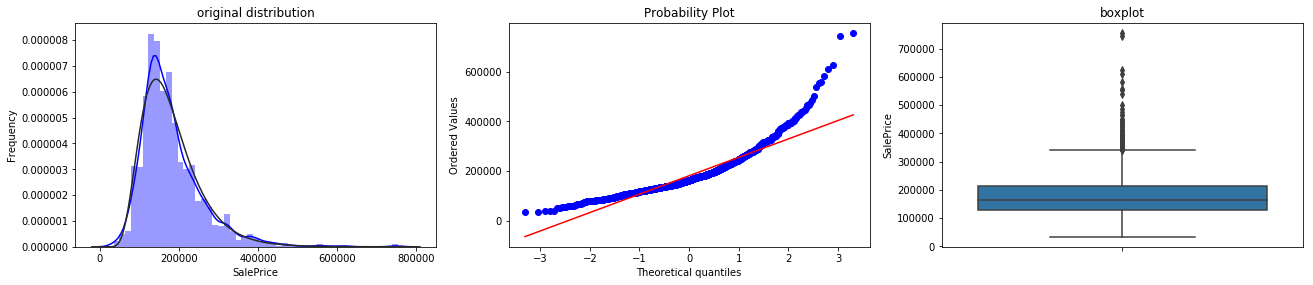

In [9]:
#plotting diffrent plots to detect outliers
fig = plt.figure(figsize=(22,14))
ax1 = fig.add_subplot(331)
plt.title('original distribution')
plt.ylabel('Frequency')
sns.distplot(SalePrice, kde=True, fit=stats.lognorm, color="blue");
ax2 = fig.add_subplot(332)
stats.probplot(SalePrice, plot=plt);
ax3 = fig.add_subplot(333)
plt.title('boxplot')
sns.boxplot(SalePrice,orient="v")
fig.show()

In [10]:
#Function to count number of outliers
def count_outliers(target,state):
    # count number of outliers before and after transformation is applied
    if state=="before":
        Q1 = target.quantile(0.25)
        Q3 = target.quantile(0.75)
        IQR = Q3 - Q1
        print("Before transformation of SalePrice")
        print("Extreme outliers(Above 700000) : {} ".format([x for x in target if x > 700000]))
        print("IQR value: {}\nTotal outliers: {}".format(IQR, ((target < (Q1 - 1.5 * IQR)) | (target > (Q3 + 1.5 * IQR))).sum()))      
    if state=="after":
        Q1 = target.quantile(0.25)
        Q3 = target.quantile(0.75)
        IQR = Q3 - Q1
        print("After transformation of SalePrice")
        print("Extreme outliers(Above 700000) : {} ".format([x for x in target if x > 700000]))
        print("IQR value: {}\nTotal outliers: {}".format(IQR, ((target < (Q1 - 1.5 * IQR)) | (target > (Q3 + 1.5 * IQR))).sum()))

In [11]:
count_outliers(SalePrice,"before")

Before transformation of SalePrice
Extreme outliers(Above 700000) : [755000, 745000] 
IQR value: 84025.0
Total outliers: 61


In [12]:
#Apply and check different transformation on SalePrice 
def target_transform(target,transformation=None):
    if(transformation is None):
        print("{} transformation ".format("Log"))
        #Log transformation for target variable
        #count no of zeores in series
        count_zero=sum(val == 0 for val in target)
        if(count_zero > 0):
            print("Transformation not applicable for zeroes values")
        else:
            SalePrice=np.log1p(target)
            return SalePrice
    #Sqrt transformation for target variable        
    if(transformation=="sqrt"):
        print("{} transformation ".format(transformation))
        SalePrice=np.sqrt(target)
        return SalePrice
    #boxcox1p transformation for target variable    
    if(transformation=="boxcox1p"):
        print("{} transformation ".format(transformation))
        SalePrice=boxcox1p(target , 0.2)
        return SalePrice

In [13]:
# since there is no zero values so Log transformation is suitable, eliminates outliers and decreases the range
SalePrice=target_transform(SalePrice)

Log transformation 


In [14]:
#lets explore our target varibale log transformation
#get the kurtosis of SalePrice
print("kurtosis: %f" % SalePrice.kurtosis())
#get the Skewness of SalePrice
print("Skewness: %f" % SalePrice.skew())
# calculate mean and standard deviation
(mu, sigma) = norm.fit(SalePrice)
print('Normal dist. (mu = {:.2f} and sigma = {:.2f} )'.format(mu, sigma))

kurtosis: 0.809519
Skewness: 0.121347
Normal dist. (mu = 12.02 and sigma = 0.40 )


In [15]:
#After log transformation
count_outliers(SalePrice,"after")

After transformation of SalePrice
Extreme outliers(Above 700000) : [] 
IQR value: 0.49863092538878107
Total outliers: 28


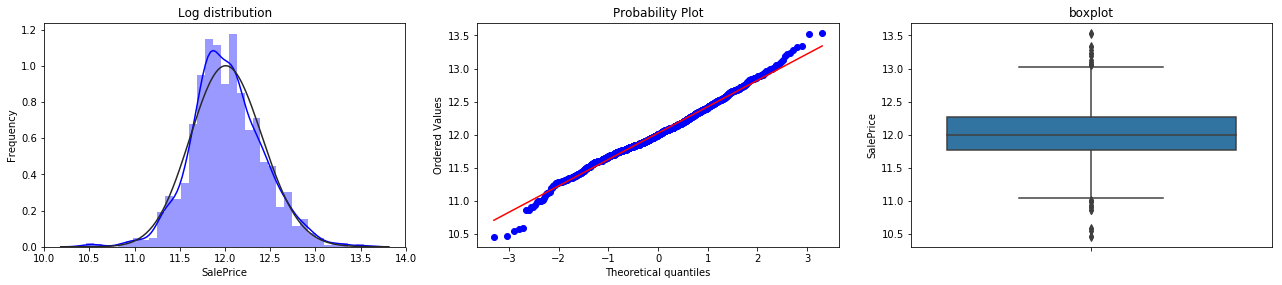

In [16]:
#plotting diffrent plots log transformation
fig = plt.figure(figsize=(22,14))
ax1 = fig.add_subplot(331)
plt.title('Log distribution')
plt.ylabel('Frequency')
sns.distplot(SalePrice, kde=True, fit=stats.lognorm, color="blue");
ax2 = fig.add_subplot(332)
stats.probplot(SalePrice, plot=plt);
ax3 = fig.add_subplot(333)
plt.title('boxplot')
sns.boxplot(SalePrice,orient="v")
fig.show()

In [17]:
SalePrice.describe()

count    1460.000000
mean       12.024057
std         0.399449
min        10.460271
25%        11.775105
50%        12.001512
75%        12.273736
max        13.534474
Name: SalePrice, dtype: float64

In [18]:
#count categorical and numerical columns
categorical_cols=[col for col in all_data.columns if all_data[col].dtype =='O']
numerical_cols=[col for col in all_data.columns if all_data[col].dtype !='O']
print("categorical_columns : \n")
print(categorical_cols)
print("\n")
print("numerical_columns :\n")
print(numerical_cols)

categorical_columns : 

['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition']


numerical_columns :

['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'Ga

In [19]:
#lets find the missing value percentage
null_percentage = (all_data.isnull().sum()/len(all_data))*100
null_ratio = null_percentage.sort_values(ascending=False)
missing_data = pd.DataFrame({'Missing Values Ratio' :null_ratio})
print(missing_data.shape)
missing_data.head(10)

(79, 1)


,Missing Values Ratio
PoolQC,99.657417
MiscFeature,96.402878
Alley,93.216855
Fence,80.438506
FireplaceQu,48.646797
LotFrontage,16.649538
GarageCond,5.447071
GarageQual,5.447071
GarageYrBlt,5.447071
GarageFinish,5.447071


In [20]:
print("Number of columns has a missing data")
print(len(null_percentage.index) - len([x for x in null_percentage.index if null_percentage.loc[x]==0]))

Number of columns has a missing data
34


In [21]:
#Handle missing data
all_data["PoolQC"] = all_data["PoolQC"].fillna("None")
all_data["MiscFeature"] = all_data["MiscFeature"].fillna("None")
all_data["Alley"] = all_data["Alley"].fillna("None")
all_data["Fence"] = all_data["Fence"].fillna("None")
all_data["FireplaceQu"] = all_data["FireplaceQu"].fillna("None")
all_data["MasVnrType"] = all_data["MasVnrType"].fillna("None")
all_data["MasVnrArea"] = all_data["MasVnrArea"].fillna(0)    
all_data['MSZoning'] = all_data['MSZoning'].fillna(all_data['MSZoning'].mode()[0])
all_data['MSSubClass'] = all_data['MSSubClass'].fillna("None")
all_data["Functional"] = all_data["Functional"].fillna("Typ")
all_data = all_data.drop(['Utilities'], axis=1)
all_data["LotFrontage"] = all_data.groupby("Neighborhood")["LotFrontage"].transform(lambda x: x.fillna(x.median()))

for col in ['GarageType', 'GarageFinish', 'GarageQual', 'GarageCond']:
    all_data[col] = all_data[col].fillna('None')
for col in ('GarageYrBlt', 'GarageArea', 'GarageCars'):
    all_data[col] = all_data[col].fillna(0)
for col in ('BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF','TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath'):
    all_data[col] = all_data[col].fillna(0)
for col in ('BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2'):
    all_data[col] = all_data[col].fillna('None')  
for col in ['Electrical','KitchenQual', 'Exterior1st', 'Exterior2nd', 'SaleType']:
    all_data[col] = all_data[col].fillna(all_data[col].mode()[0])
    

In [22]:
null_percentage = (all_data.isnull().sum()/len(all_data))*100
null_ratio = null_percentage.sort_values(ascending=False)
missing_data = pd.DataFrame({'Missing Values Ratio' :null_ratio})
print("Number of columns has a missing data")
print(len(null_percentage.index) - len([x for x in null_percentage.index if null_percentage.loc[x]==0]))

Number of columns has a missing data
0


In [23]:
#Converting some numerical variables that are really categorical type
all_data['MSSubClass'] = all_data['MSSubClass'].apply(str)
all_data['OverallCond'] = all_data['OverallCond'].astype(str)
all_data['YrSold'] = all_data['YrSold'].astype(str)
all_data['MoSold'] = all_data['MoSold'].astype(str)

In [24]:
# Adding total sqfootage feature 
all_data['TotalSF'] = all_data['TotalBsmtSF'] + all_data['1stFlrSF'] + all_data['2ndFlrSF']

In [25]:
cols_label = ['FireplaceQu', 'BsmtQual', 'BsmtCond', 'GarageQual', 'GarageCond', 
        'ExterQual', 'ExterCond','HeatingQC', 'PoolQC', 'KitchenQual', 'BsmtFinType1', 
        'BsmtFinType2', 'Functional', 'Fence', 'BsmtExposure', 'GarageFinish', 'LandSlope',
        'LotShape', 'PavedDrive', 'Street', 'Alley', 'CentralAir', 'MSSubClass', 'OverallCond', 
        'YrSold', 'MoSold']
#Convert Features in label encoding
enc_label=LabelEncoder()
for columns in cols_label:
    all_data[columns] = enc_label.fit_transform(all_data[columns]) 

In [26]:
numerical_features=all_data.dtypes[all_data.dtypes != "object"].index
skew_percentage = all_data[numerical_features].apply(lambda x: skew(x.dropna())).sort_values(ascending=False)
print("\nSkew in numerical features: \n")
skewness = pd.DataFrame({'Skew' :skew_percentage})
skewness.head(10)


Skew in numerical features: 



,Skew
MiscVal,21.947195
PoolArea,16.898328
LotArea,12.822431
LowQualFinSF,12.088761
3SsnPorch,11.376065
LandSlope,4.975157
KitchenAbvGr,4.302254
BsmtFinSF2,4.146143
EnclosedPorch,4.003891
ScreenPorch,3.946694


In [27]:
#log transformation for top 5 features with high skewness
skew_feat=skewness.iloc[:5]
for columns in skew_feat.index:
    all_data[columns] = boxcox1p(all_data[columns],0.2) 
 

In [28]:
# scale all numerical feature 
scale=StandardScaler()
numerical_features=all_data.dtypes[all_data.dtypes != "object"].index
all_data[numerical_features]=scale.fit_transform(all_data[numerical_features].values)

In [29]:
# get dummies for categorical variable
all_data=pd.get_dummies(all_data)

In [30]:
# split the data in training and prediction set
train_set=all_data[:len(train_ID)]
predict_set=all_data[len(test_ID)+1:]

# Model

In [31]:
#splits the dataset into training and testing set
X_train, X_test, Y_train, Y_test = train_test_split(train_set, SalePrice, test_size=0.20, random_state=42)

In [32]:
model_name=[]
r_sqaure_value=[]
mean_sqaure_value=[]
def calculate_metrics(model, predicted_value, test_value ):
    if model not in model_name:
        model_name.append(model)
        r_sqaure_value.append(r2_score(predicted_value,test_value))
        mean_sqaure_value.append(mean_squared_error(predicted_value,test_value))
#         print(model_name)
#         print(r_sqaure_value)
#         print(mean_sqaure_value)

In [33]:
# generalized ridge regression with builtin cross validation
params={'alphas':[0.001, 0.01 , 0.1 ,1.0],
 'cv': 5,
 'fit_intercept': True,
 'gcv_mode': None,
 'normalize': False,
 'scoring': None,
 'store_cv_values': False}

ridge_reg=RidgeCV(**params)
ridge_reg.fit(X_train,Y_train)
ridge_predicted=ridge_reg.predict(X_test)
calculate_metrics("LassoCv", ridge_predicted, Y_test)

In [34]:
# generalized lasso regression with builtin cross validation

params={'alphas':[0.1,0.001,0.003,0.0001],
 'copy_X': True,
 'cv': 5,
 'eps': 0.001,
 'fit_intercept': True,
 'max_iter': 2000,
 'n_alphas': 100,
 'n_jobs': None,
 'normalize': False,
 'positive': False,
 'precompute': 'auto',
 'random_state': None,
 'selection': 'cyclic',
 'tol': 0.0001,
 'verbose': False}

lasso_reg = LassoCV(**params)
lasso_reg.fit(X_train,Y_train)
lasso_predicted=lasso_reg.predict(X_test)
calculate_metrics("RidgeCV", lasso_predicted, Y_test)

In [35]:
# generalized ElasticNetCV with builtin cross validation
params={'alphas': [0.1,0.001, 0.02,1.0],
 'copy_X': True,
 'cv': 5,
 'eps': 0.001,
 'fit_intercept': True,
 'l1_ratio': [0.5,0.4],
 'max_iter': 3000,
 'n_alphas': 100,
 'n_jobs': None,
 'normalize': False,
 'positive': False,
 'precompute': 'auto',
 'random_state': None,
 'selection': 'cyclic',
 'tol': 0.0001,
 'verbose': 0}

Enet=ElasticNetCV(**params)
Enet.fit(X_train,Y_train)
Enet_predicted=Enet.predict(X_test)
calculate_metrics("ElasticNetCV", Enet_predicted, Y_test)

In [36]:
#Grid Search for SVR
start = time.time()
print("Grid Search Started : {}".format(start))
grid_ser_svr = GridSearchCV(
        estimator=SVR(),
        param_grid={'C': [0.1, 1, 0.2],
                    'epsilon': [0.0001, 0.001, 0.005],
                    'gamma': [0.0001, 0.001, 0.1 ],
                    'kernel': ["linear", "poly", "rbf"] 
                   },
        cv=5, scoring='neg_mean_squared_error', verbose=0, n_jobs=-1)
svr_grid= grid_ser_svr.fit(X_train,Y_train)
end = time.time()
print("Grid Search ended: {}".format(end))
print("Elapsed time for Grid search: {}".format(end-start))
print("Best parameters for grid search\n")
print(svr_grid.best_params_)
print("\n")
calculate_metrics("SVR", svr_grid.predict(X_test), Y_test)

Grid Search Started : 1564325128.2449677
Grid Search ended: 1564325409.5563483
Elapsed time for Grid search: 281.3113806247711
Best parameters for grid search

{'C': 1, 'epsilon': 0.005, 'gamma': 0.001, 'kernel': 'rbf'}




In [37]:
#Implementation of Decision tree
params={'criterion': 'mse',
 'max_depth':  None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'presort': True,
 'random_state': None,
 'splitter': 'best'}
deci_tree_reg=DecisionTreeRegressor(**params)
deci_tree_reg.fit(X_train,Y_train)
decision_predicted=deci_tree_reg.predict(X_test)
calculate_metrics("Decision Tree", decision_predicted, Y_test)

In [38]:
#Grid Search for Random Forest Regressor
start = time.time()
print("Grid Search Started : {}".format(start))
grid_ser_rand = GridSearchCV(
        estimator=RandomForestRegressor(),
        param_grid={'max_depth': [60, 50, 40, 45],
                   'n_estimators': [5,6,7, 8],
                   'max_leaf_nodes': [2, 3, 4,5,6]},
        cv=5, scoring='neg_mean_squared_error', verbose=0, n_jobs=-1)
random_grid= grid_ser_rand.fit(X_train,Y_train)
end = time.time()
print("Grid Search ended: {}".format(end))
print("Time taken by  Grid search: {}".format(end-start))
print("Best parameters for grid search : \n")
print(random_grid.best_params_)
calculate_metrics("Random Forest", random_grid.predict(X_test), Y_test)

Grid Search Started : 1564325409.820138
Grid Search ended: 1564325415.5642335
Time taken by  Grid search: 5.74409556388855
Best parameters for grid search : 

{'max_depth': 50, 'max_leaf_nodes': 6, 'n_estimators': 8}


In [39]:
#Grid Search for gradient boosting Regressor
start = time.time()
print("Grid Search Started : {}".format(start))
grid_ser_boost = GridSearchCV(
        estimator=GradientBoostingRegressor(),
        param_grid={'max_depth': [3, 4, 6, 8],
                   'n_estimators': [100,120,80,90]},
        cv=5, scoring='neg_mean_squared_error', verbose=0, n_jobs=-1)
gra_grid= grid_ser_boost.fit(X_train,Y_train)
end = time.time()
print("Grid Search ended: {}".format(end))
print("Time taken by  Grid search: {}".format(end-start))
print("Best parameters for grid search\n")
print(gra_grid.best_params_)
calculate_metrics("GDBRT", gra_grid.predict(X_test), Y_test)

Grid Search Started : 1564325415.5819929
Grid Search ended: 1564325461.8028452
Time taken by  Grid search: 46.22085237503052
Best parameters for grid search

{'max_depth': 4, 'n_estimators': 120}


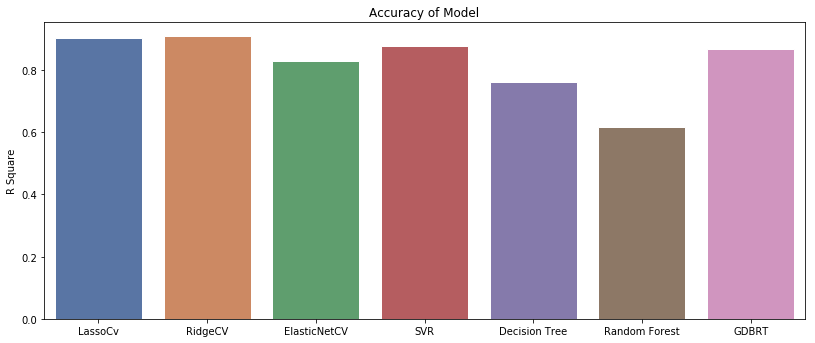

In [40]:
#plotting Accuracy of model
fig = plt.figure(figsize=(30,12))
ax1 = fig.add_subplot(221)
plt.title('Accuracy of Model')
plt.ylabel('R Square')
sns.set(style="whitegrid")
sns.barplot(x=model_name, y=r_sqaure_value)
fig.show()

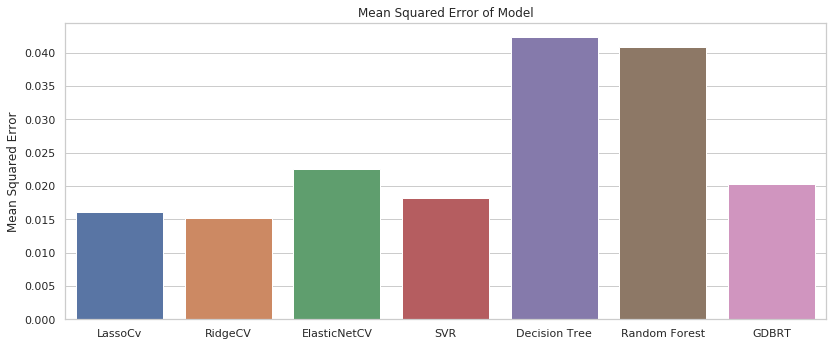

In [41]:
#plotting Mean Square error of model
fig = plt.figure(figsize=(30,12))
ax1 = fig.add_subplot(221)
plt.title('Mean Squared Error of Model')
plt.ylabel('Mean Squared Error')
sns.set(style="whitegrid")
sns.barplot(x=model_name, y= mean_sqaure_value)
fig.show()

# Ensembling

In [42]:
#Taking Average predicted price of all model
print("Predicting price of house")
final_price=(np.expm1(ridge_reg.predict(predict_set))
+np.expm1(svr_grid.predict(predict_set))
+np.expm1(lasso_reg.predict(predict_set))
+np.expm1(Enet.predict(predict_set))
+np.expm1(gra_grid.predict(predict_set))
+np.expm1(deci_tree_reg.predict(predict_set)))/6
final_price

Predicting price of house


array([121467.26350649, 153754.06475063, 178161.87705803, ...,
       166298.44581964, 120207.59895137, 226904.33916343])

In [43]:
submit = pd.DataFrame()
submit['Id'] = test_ID
submit['SalePrice'] = final_price
submit.to_csv('submission.csv',index=False)